<a href="https://colab.research.google.com/github/megan-the-astronomer/ASTR229/blob/main/fitting_models_to_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting models to data

Last week, we took our model for a star, a blackbody, and built the code to generate a model spectrum.

Often times we want to fit a model to real data.
For a simple example, we could measure the location of an object and the velocity of an object. If it is coasting, then we can easily fit a linear model because distance = rate * time.

This kind of model fitting is what we mean when we talk about main sequence fitting to determine distances. First, observe a star cluster and make an H-R diagram. Then fit a model - usually a single-age stellar population. The best fit of the model to the data can be used to derive the distance to the star cluster.

Let's look at some simple model fitting.

In [ ]:
# start by importing a few essentials
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy.io import fits
from astropy.table import Table
import astropy.constants as const
import astropy.units as u

# To start: estimate some quantities that we'll use to derive a scaling relationship

Last week, we made an assumption about how the radius of a main-sequence star scales with the mass.

Let's test that assumption. Use the main sequence star data you have access to in the ```ASTR229_data``` folder to estimate the radius of a star from the luminosity.

In [ ]:
# your code here

Now, plot the mass of the star versus the radius.

We assumed $M \sim r$ or a linear relationship between the two quantities. Plot a line on your graph to see how good that assumption is.

In [ ]:
# your code here

If all went well, you should see that a straight line is a rough approximation but not a perfect representation of the data. You can play around with plotting different lines (e.g., change the slope and intercept) to see how close you can get.

Rather than spending a lot of time on trial and error, we can fit the model to the data.

# simple model fitting

Recommended reading: https://docs.astropy.org/en/latest/modeling/index.html

In this example, we will use tools from ```astropy.modeling``` although there are many, many other python tools for fitting models to data and assessing the goodness-of-fit.

To start, we need to define the model we want to fit and the fitter to use to fit the model to the data.  

In [ ]:
# import the modeling tools
from astropy.modeling import models, fitting

In [ ]:
# some numbers for the next cell
# be sure to use your data!
radii = np.array([6.6, 1.8, 1.4, 1.15, 0.96, 0.7])
masses = np.array([16, 2.1, 1.4, 1.04, 0.8, 0.45])

In [ ]:
# define the model to fit - in this case, a linear function
# input a starting guess for the slope and intercept
t_init = models.Linear1D(slope=1, intercept=0)
# select the fitter to use
fit_t = fitting.TRFLSQFitter()
# fit the model to the data
t = fit_t(t_init, radii, masses, maxiter=200)

In [ ]:
# plot the results

Hopefully the line is close to the data. Try playing around with different inital guesses for the slope and intercept. Does this change the best-fit parameters?  

How can we quantify how well the model fits the data?
The simplest way is to calculate the root mean square (RMS) error. The RMS is calculated as follows:

\begin{equation}
RMS = \sqrt{ \frac{\Sigma (x_{data} - x_{model})^2}{N} }
\end{equation}

where
$x_{data}$ is your data,
$x_{model}$ is the model, and
$N$ is the number of samples.

In [ ]:
# your code here

Think about how you expect the RMS to change if the model is a better representation of the data.

Now try fitting a polynomial instead of a straight line.
Calculate the RMS for the polynomial fit. How does it compare to the linear fit?

In [ ]:
# your code here

If your RMS did not *decrease*, try a different order polynomial to fit.

# thinking about units and numerical precision

Astronomy involves a lot of big numbers - a Solar mass is $\sim 2 \times 10^{30}$ kg, galaxies can be $\gtrsim 10^9$ M$_{\odot}$, and ages are typically in the million and billions of years.

These big numbers can introduce some challenges in computing. Computers only have a finite amount of memory to store information (like all the digits in your number) which can lead to rounding errors and problems accurately representing very large and very small numbers.
For some entertaining examples of this (and a great explanation of why you shouldn't do your scientific analysis in Excel), you might enjoy the book [Humble Pi by Matt Parker](https://www.penguinrandomhouse.com/books/610964/humble-pi-by-matt-parker/).

Working with very large numbers can also create problems when trying to fit models to data. In astronomy, we are often looking for (comparatively) small variations between (comparatively) large numbers.

For some applications, it make sense to find a solution to store really large numbers with adequate precision.

For everything we do in this class and much of what we do in astronomy, there is an easier way.

How easy is it to compare the mass of these two stars?

In [ ]:
print('Star 1 has a mass of '+str(const.M_sun.value)+' '+str(const.M_sun.unit))
print('Star 2 has a mass of '+str(5.*const.M_sun.value)+' '+str(const.M_sun.unit))

Star 1 has a mass of 1.988409870698051e+30 kg
Star 2 has a mass of 9.942049353490255e+30 kg


compared to...

In [ ]:
print('Star 1 has a mass of 1 M_sun')
print('Star 2 has a mass of 5 M_sun')

Star 1 has a mass of 1 M_sun
Star 2 has a mass of 5 M_sun


Now consider the following plots. Which is easier to read?

Option 1:

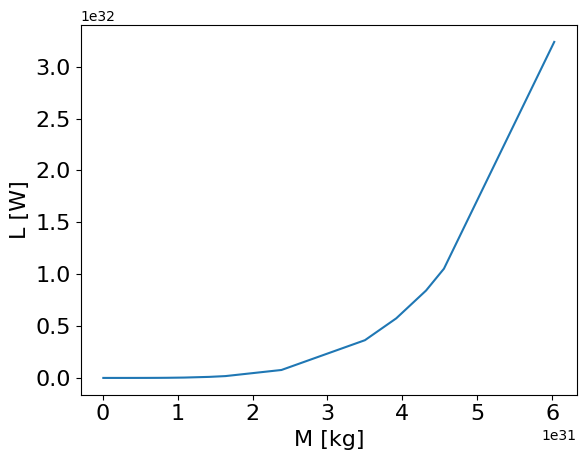

Option 2:

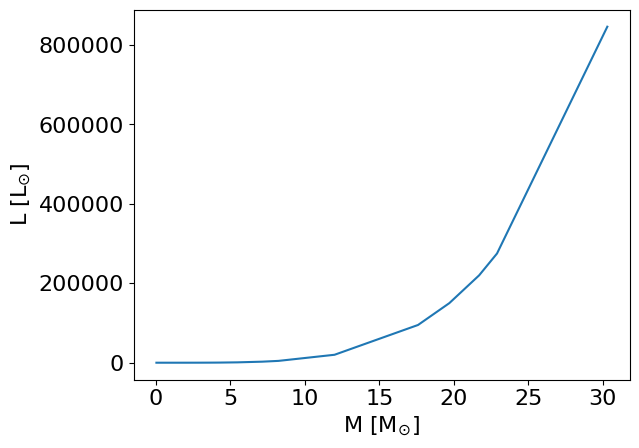

Option 3:

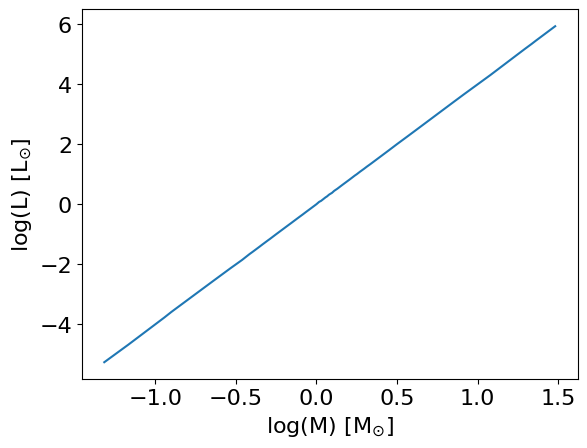

Very often, we can make life simpler by using units that are defined relative to the Sun (e.g., M$_{\odot}$, L$_{\odot}$, R$_{\odot}$).

When in doubt, check your units! Were the radii you derived from the luminosity in units of m or R$_{\odot}$?

Keep this in mind when setting up your data to feed into a model and when making your plots. Notice how increasing the font size on the axis labels does not change the size of the exponent shown on the first graph. Demonstrate your understanding by turning in high-quality plots with this and every assignment.

### your turn

Derive a scaling relationship between luminosity with mass on the main sequence using your newfound fitting skills.

In [ ]:
# your code here

# Caveats! Beware simple results from simple models!

The scaling relationships derived from the model data are not too bad considering how simple our model is.

When more physics is included, you can derive better scaling relations.

How do people do this observationally? Typically with a lot of painstaking work observing binary systems. For the interested reader, take a look at, e.g., [Eker et al. (2015)](https://iopscience.iop.org/article/10.1088/0004-6256/149/4/131).

# Help! My code doesn't work!

For the second part of this assignment, we're going to practice debugging and troublshooting.

Often code doesn't work right away so it is a good idea to build your skills for debugging - that is, identifying and solving problems in your code.

In the next sections, we'll look at a few different common errors.

### Syntax errors

A syntax error is a mistake in the structure of the code. This can be little things like typos and missing parentheses. It can also include problems like not having proper indentation in a loop.

The following code has a syntax error. Find it and fix it so that the code runs and outputs the correct result.

In [ ]:
def parsecs_to_light_years(parsecs):
    light_years = parsecs * 3.262
    return light_years

# Calculate light-years for a star 10 parsecs away
distance = 10
light_years = parsecs_to_light_years(distance)
print("Distance in light-years is: " light_years)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-3246103004.py, line 8)

Be sure to look at the error message!

The next example has two errors. Fix and explain them both. Describe what, if anything, you did differently to troubleshoot a larger block of code.

In [ ]:
def gravitational_force(mass1, mass2, distance):
    G = 6.674 * (10 ** -11)  # Gravitational constant
    force = (G * mass1 * mass2) / distance^2
    return

# Define masses in kilograms and distance in meters
mass_star1 = 1.989 * (10 ** 30)  # Mass of the sun
mass_star2 = 5.974 * (10 ** 24)   # Mass of the Earth
distance_apart = 1.496 * (10 ** 11)  # Distance in meters

# Calculate gravitational force
force = gravitational_force(mass_star1, mass_star2, distance_apart)
print("Gravitational force between the stars is: ", force)

### Runtime errors

A runtime errors occurs during the execution of the code. These often cause the code to terminate unexpectedly.

Find and fix the runtime error in the code below.

In [ ]:
def average_distance(distances):
    total_distance = sum(distances)
    return total_distance / len(distances)

# List of distances
planet_distances = [0.39, 0.72, 1.0, None, 5.2]

# Calculate average distance
avg_distance = average_distance(planet_distances)
print("Average distance of planets from the Sun: ", avg_distance)

Common errors in this category include invalid indices and incompatible datatypes.

Find and fix the runtime error in the code below.

In [ ]:
def calculate_orbital_period(semi_major_axis):
    # Using Kepler's 3rd law: P^2 = a^3, where P is the orbital period in Earth years and a is the semi-major axis in AU
    return (semi_major_axis ** 1.5)

# List of semi-major axes for planets in Astronomical Units (AU)
planet_semi_major_axes = [0.39, 0.72, 1.0, 1.52, 'not a number', 5.2]

# Calculate orbital periods
orbital_periods = []
for axis in planet_semi_major_axes:
    period = calculate_orbital_period(axis)
    orbital_periods.append(period)

print("Orbital periods of planets: ", orbital_periods)

### Logic errors

The final type of error we will examine are logic errors. These can be sneaky because often the code will run but it will produce incorrect results. This is one of the reasons you want to test your code on something where you know the answer (e.g., calculating the luminosity of the Sun).

Find and fix and the logic error in the code below.

In [ ]:
def total_mass(star_masses):
    total = 0
    for mass in star_masses:
        total += mass
    return total

# List of star masses in solar masses
star_masses = [1.0, 0.5, 1.5, 2.0]
# stellar mass to exclude
excluded_star_mass = 1.2

# Calculate total mass of the stars
total = total_mass(star_masses)
print("Total mass of the stars is: ", total)

# Indicate the excluded mass
print("The excluded star mass was: ", excluded_star_mass)

Reflect on how identifying and fixing logic errors is different than identifying and fixing syntax and runtime errors.

Then find and fix the error in the code below.

In [ ]:
def gravitational_potential_energy(mass1, mass2, distance):
    G = 6.674 * (10 ** -11)  # Gravitational constant
    potential_energy = (G * mass1 * mass2) / distance
    return potential_energy

# Define masses in kilograms
mass_star1 = 1.989 * (10 ** 30)  # Mass of the Sun
mass_star2 = 5.974 * (10 ** 24)   # Mass of the Earth
distance_apart = 1.496 * (10 ** 11)  # Distance in meters

# Calculate gravitational potential energy
energy = gravitational_potential_energy(mass_star1, mass_star2, distance_apart)
print("Gravitational potential energy between the stars is: ", energy)